# 📊 Assignment: Predicting 2024 Data Science Salaries Using Linear Regression

**Course**: Data Analytics with Python  
**Instructor**: Leonard Andrew Mesiera  
**Due Date**: October 22, 2025

## 🎯 Learning Objectives
By the end of this assignment, you will be able to:
- Load and explore a real-world dataset
- Prepare data for linear regression (feature engineering, encoding, cleaning)
- Train a simple linear regression model using `scikit-learn`
- Evaluate your model using metrics like R² and interpret results
- Make predictions for future years (e.g., 2024)

## 📁 Dataset
You are given the file: `Data Science Salary 2021 to 2023.csv`

This dataset contains salary information for data professionals from 2021 to 2023, including:
- `work_year`: The year the salary was recorded
- `experience_level`: EN (Entry), MI (Mid), SE (Senior), EX (Executive)
- `job_title`: e.g., Data Scientist, Data Analyst, etc.
- `salary_in_usd`: Salary converted to USD (this is your target variable)
- Other useful columns: `employment_type`, `company_location`, `company_size`

Your goal: **Predict average salaries for 2024** using linear regression.

## 🛠️ Part 1: Setup and Data Loading

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder

# Load the dataset
df = pd.read_csv('datasets\Data Science Salary 2021 to 2023.csv')

# Display first few rows
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,company_location,company_size
0,2023,EN,FT,Applied Scientist,213660,USD,213660,US,L
1,2023,EN,FT,Applied Scientist,130760,USD,130760,US,L
2,2023,EN,FT,Data Quality Analyst,100000,USD,100000,NG,L
3,2023,EN,FT,Compliance Data Analyst,30000,USD,30000,NG,L
4,2023,EN,FT,Applied Scientist,204620,USD,204620,US,L


In [2]:
# Check basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3761 entries, 0 to 3760
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   work_year         3761 non-null   int64 
 1   experience_level  3761 non-null   object
 2   employment_type   3761 non-null   object
 3   job_title         3761 non-null   object
 4   salary            3761 non-null   int64 
 5   salary_currency   3761 non-null   object
 6   salary_in_usd     3761 non-null   int64 
 7   company_location  3761 non-null   object
 8   company_size      3761 non-null   object
dtypes: int64(3), object(6)
memory usage: 264.6+ KB


## 🔍 Part 2: Exploratory Data Analysis (EDA)

Answer the following in markdown cells below (or as code comments):

1. How many unique job titles are there?
2. What is the average salary (`salary_in_usd`) per `work_year`?
3. Create a bar plot showing average salary by `experience_level`.

> 💡 Tip: Use `groupby()` and `mean()`.

There are 93 unique job titles in the dataset.

Average salary_in_usd per work_year:
   work_year  salary_in_usd
0       2020   92302.631579
1       2021   94087.208696
2       2022  133379.510804
3       2023  148954.558413

Average Salary per Experience Level:
  experience_level  salary_in_usd
0               EN   78546.284375
1               EX  194930.929825
2               MI  104544.864030
3               SE  153062.468626


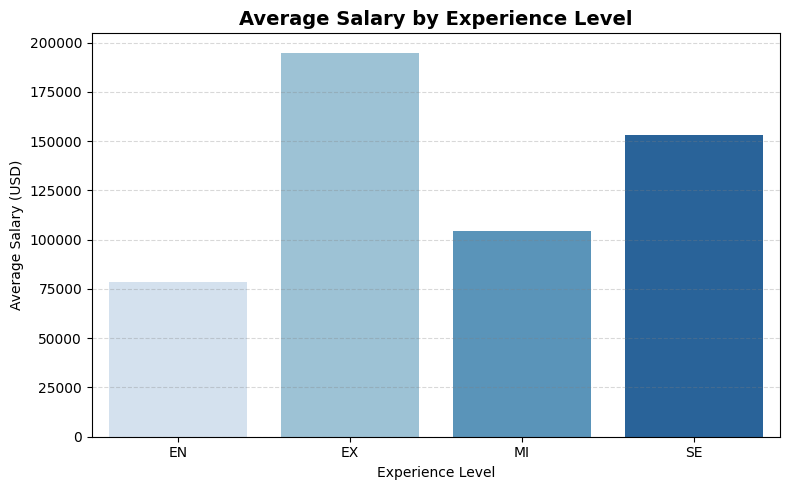

In [3]:
# Your EDA code here

# Check number of unique job titles
jobs = df['job_title'].unique()
print(f'There are {len(jobs)} unique job titles in the dataset.')

# Average salary per year
average_salary_per_year = df.groupby('work_year', as_index=False)['salary_in_usd'].mean()
print("\nAverage salary_in_usd per work_year:")
print(average_salary_per_year)

# Average salary per experience level
exp_salary = df.groupby('experience_level', as_index=False)['salary_in_usd'].mean()
print("\nAverage Salary per Experience Level:")
print(exp_salary)

# Plot average salary by experience level (future-proof)
plt.figure(figsize=(8, 5))
sns.barplot(
    data=exp_salary,
    x='experience_level',
    y='salary_in_usd',
    hue='experience_level',   
    palette='Blues',
    legend=False            
)
plt.title('Average Salary by Experience Level', fontsize=14, fontweight='bold')
plt.xlabel('Experience Level')
plt.ylabel('Average Salary (USD)')
plt.grid(axis='y', alpha=0.3, linestyle='--', color='gray')
plt.tight_layout()
plt.show()

## 🧹 Part 3: Data Preprocessing for Linear Regression

We will predict `salary_in_usd` using **only numerical or encoded categorical features**.

### Steps:
1. Select features: `work_year`, `experience_level`, and optionally `job_title` (you decide!)
2. Encode categorical variables (`experience_level`) using `LabelEncoder` or `pd.get_dummies()`
3. Define `X` (features) and `y` (target = `salary_in_usd`)

> ⚠️ **Important**: Do NOT include `salary`, `salary_currency`, or `salary_in_usd` in your features!

In [4]:
# Example: Encode experience_level
le = LabelEncoder()
df['experience_level_encoded'] = le.fit_transform(df['experience_level'])

# Encode job_title using one-hot encoding
df = pd.get_dummies(df, columns=['job_title'], drop_first=True)

# Choose features (include work_year, experience level, and job titles)
features = ['work_year', 'experience_level_encoded'] + [col for col in df.columns if col.startswith('job_title_')]

# Define X (features) and y (target)
X = df[features]
y = df['salary_in_usd']

X.columns = X.columns.str.replace('job_title_', '', regex=False)

X.head()

,work_year,experience_level_encoded,AI Developer,AI Programmer,AI Scientist,Analytics Engineer,Applied Data Scientist,Applied Machine Learning Engineer,Applied Machine Learning Scientist,Applied Scientist,...,Principal Data Engineer,Principal Data Scientist,Principal Machine Learning Engineer,Product Data Analyst,Product Data Scientist,Research Engineer,Research Scientist,Software Data Engineer,Staff Data Analyst,Staff Data Scientist
0,2023,0,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1,2023,0,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,2023,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2023,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2023,0,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


## 📈 Part 4: Train a Linear Regression Model

In [5]:
# Split data into train and test sets (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate
print(f"R² Score: {r2_score(y_test, y_pred):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")

R² Score: 0.19
RMSE: 57875.77


## 🔮 Part 5: Predict 2024 Salaries

Now, create a small DataFrame for **2024** with different experience levels and predict their salaries.

Use the same encoding as before!

In [6]:
# Map experience levels to encoded values (check your LabelEncoder!)
# Example: EN=0, MI=1, SE=2, EX=3 (confirm with `le.classes_`)

# Check how experience levels were encoded
print("Encoding map:")
for i, label in enumerate(le.classes_):
    print(f"{label} = {i}")

# Create base DataFrame for 2024
future_data = pd.DataFrame({
    'work_year': [2024, 2024, 2024, 2024],
    'experience_level_encoded': [0, 1, 2, 3]
})

# Add all job
for col in X.columns:
    if col not in future_data.columns:
        future_data[col] = 0

# Reorder columns to match training data
future_data = future_data[X.columns]

# Predict using the trained model
predicted_salaries = model.predict(future_data)

# Display results
results = pd.DataFrame({
    'Experience Level': ['Entry', 'Mid', 'Senior', 'Executive'],
    'Predicted 2024 Salary (USD)': predicted_salaries
})

print("\nPredicted Salaries for 2024:")
results

Encoding map:
EN = 0
EX = 1
MI = 2
SE = 3

Predicted Salaries for 2024:


,Experience Level,Predicted 2024 Salary (USD)
0,Entry,19993.047817
1,Mid,38421.587956
2,Senior,56850.128095
3,Executive,75278.668234


## 📝 Part 6: Reflection (Answer in a Markdown Cell)

1. Does your model make reasonable predictions? Why or why not?

   > I think the model makes somewhat reasonable predictions but not entirely accurate. Since it’s based only on work_year and experience_level, it can capture basic salary trends over time and between experience levels. However, salary variation is influenced by many other factors, like job title, company size, and location,so the predictions are limited in scope and precision.
3. What are the limitations of using only `work_year` and `experience_level`?

   > Using only work_year and experience_level limits the model’s ability to capture real salary variations. Salaries are heavily influenced by other variables such as job title, company location, company size, and employment type. For instance, a senior developer in a large tech company in the U.S. may earn significantly more than a senior developer in a small company in another country. By excluding these important features, the model cannot accurately reflect salary differences across roles, industries, and regions.
5. How could you improve this model? (Think: more features, better encoding, etc.)

   > We can improve the model by adding more important features like job_title, company_location, company_size, and employment_type so it can better understand what affects salaries. It would also help to use one-hot encoding for text-based data so the model can read it properly. Using salary_in_usd would make salary values more consistent. Lastly, trying more advanced models like Random Forest or Gradient Boosting and using cross-validation can make the predictions more accurate and reliable.
7. Why is **R² not enough** to trust your predictions?

    >R² alone is not enough to trust the predictions because it only shows how much of the salary changes the model can explain, not how accurate the predictions really are. A model can have a high R² but still make big mistakes or fit the data too closely. Also, linear regression assumes a straight-line relationship, while salaries often grow in more complex ways. To check accuracy better, it’s good to also look at other metrics.
> 💡 Remember: Linear regression assumes a **linear trend**—but real salaries may grow non-linearly!

## 📤 Submission Instructions

- Save this notebook as: `LastName_FirstName_SalaryPrediction.ipynb`
- Ensure all code runs without errors
- Include your answers to the reflection questions
- Submit via [your LMS/email/etc.]

Good luck! 🚀